Iteration 0, Loss=592.1469, w=0.1278, b=0.4507
Iteration 100, Loss=53.2484, w=5.5586, b=19.6043
Iteration 200, Loss=43.7702, w=6.2789, b=22.1444
Iteration 300, Loss=43.6035, w=6.3744, b=22.4813
Iteration 400, Loss=43.6006, w=6.3870, b=22.5260
Iteration 500, Loss=43.6006, w=6.3887, b=22.5319
Iteration 600, Loss=43.6006, w=6.3889, b=22.5327
Iteration 700, Loss=43.6006, w=6.3890, b=22.5328
Iteration 800, Loss=43.6006, w=6.3890, b=22.5328
Iteration 900, Loss=43.6006, w=6.3890, b=22.5328

Final parameters: w=6.3890, b=22.5328, Final Loss=43.6006

Evaluation Metrics:
MSE  = 43.6006
RMSE = 6.6031
MAE  = 4.4478
R²   = 0.4835


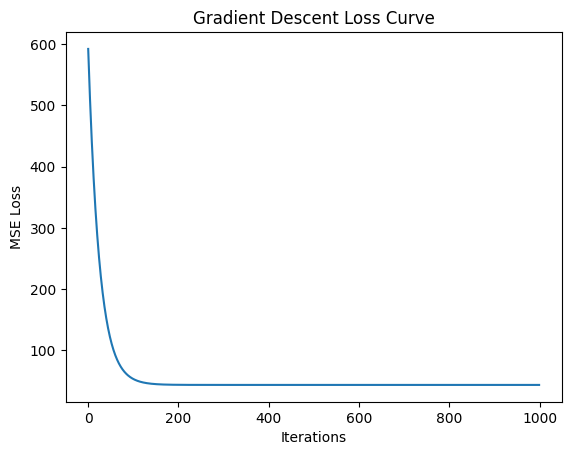

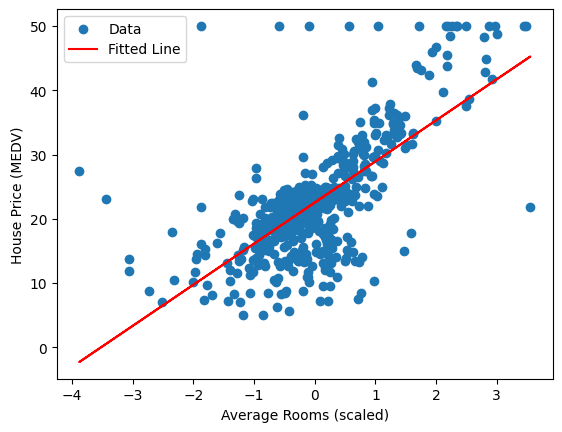

In [5]:
# Gradient Descent on Boston Housing with metrics
# "https://www.kaggle.com/datasets/altavish/boston-housing-dataset"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
boston = pd.read_csv("HousingData.csv")

# Feature = RM, Target = MEDV
X = boston['RM'].values
y = boston['MEDV'].values

# Reshape and scale feature
X = X.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).flatten()

# Initialize parameters
w = 0.0
b = 0.0
lr = 0.01
n_iters = 1000
n = len(y)

losses = []

# Gradient Descent loop
for i in range(n_iters):
    y_pred = w * X_scaled + b
    error = y_pred - y

    # Gradients
    dw = (2/n) * np.dot(error, X_scaled)
    db = (2/n) * np.sum(error)

    # Update
    w -= lr * dw
    b -= lr * db

    # Loss (MSE)
    loss = np.mean(error ** 2)
    losses.append(loss)

    if i % 100 == 0:
        print(f"Iteration {i}, Loss={loss:.4f}, w={w:.4f}, b={b:.4f}")

print(f"\nFinal parameters: w={w:.4f}, b={b:.4f}, Final Loss={losses[-1]:.4f}")

# ---- Measuring Parameters ----
y_pred_final = w * X_scaled + b

MSE = np.mean((y - y_pred_final) ** 2)
RMSE = np.sqrt(MSE)
MAE = np.mean(np.abs(y - y_pred_final))
SS_res = np.sum((y - y_pred_final) ** 2)
SS_tot = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (SS_res / SS_tot)

print("\nEvaluation Metrics:")
print(f"MSE  = {MSE:.4f}")
print(f"RMSE = {RMSE:.4f}")
print(f"MAE  = {MAE:.4f}")
print(f"R²   = {R2:.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Curve")
plt.show()

# Plot fitted line
plt.scatter(X_scaled, y, label="Data")
plt.plot(X_scaled, y_pred_final, color="red", label="Fitted Line")
plt.xlabel("Average Rooms (scaled)")
plt.ylabel("House Price (MEDV)")
plt.legend()
plt.show()